In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

**(01)**

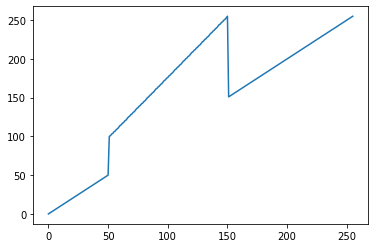

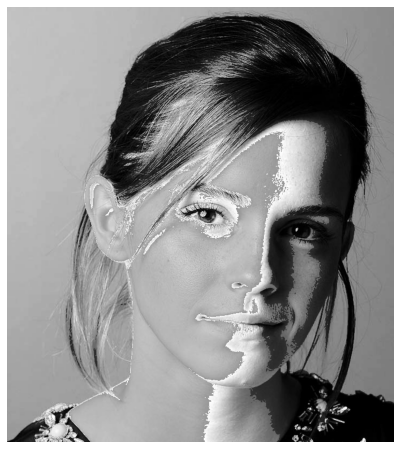

In [21]:
f = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,50,51)
t2 = np.linspace(51,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(255,150,0)
t5 = np.linspace(151,255,105)

t = np.concatenate((t1,t2,t3,t4,t5), axis=0).astype(np.uint8)
fig, ax = plt.subplots()
ax.plot(t)

g = cv.LUT(f, t)

img = cv.cvtColor(g, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(8,8))
plt.axis('off')
ax.imshow(img)
plt.show()

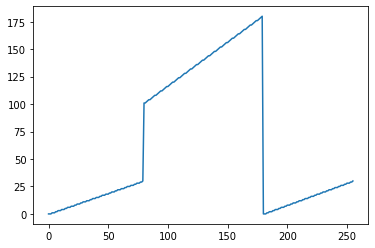

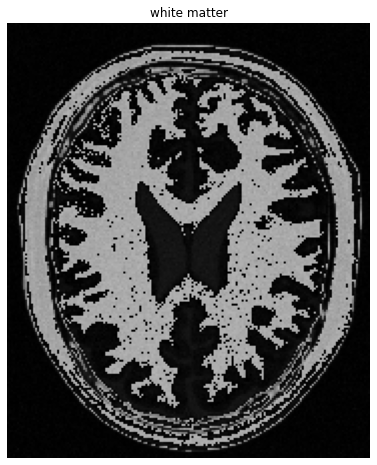

In [33]:
f = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,30,80)
t2 = np.linspace(31,100,0)
t3 = np.linspace(101,180,100)
t4 = np.linspace(0,30,76)

t = np.concatenate((t1,t2,t3,t4), axis=0).astype(np.uint8)
fig, ax = plt.subplots()
ax.plot(t)
g = cv.LUT(f, t)

img = cv.cvtColor(g, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(8,8))
plt.axis('off')
ax.set_title('white matter')
ax.imshow(img)
plt.show()

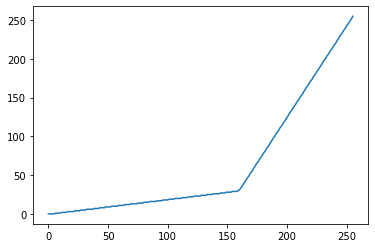

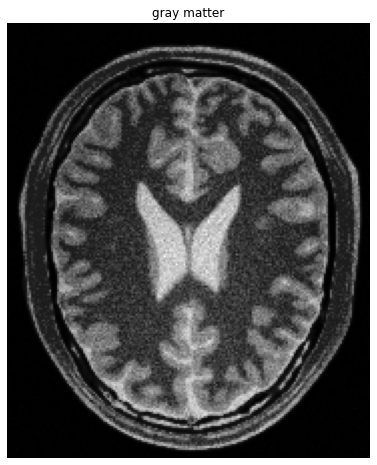

In [44]:
f = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,30,160)
t2 = np.linspace(31,255,96)

t = np.concatenate((t1,t2), axis=0).astype(np.uint8)
fig, ax = plt.subplots()
ax.plot(t)
g = cv.LUT(f, t)

img = cv.cvtColor(g, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(8,8))
plt.axis('off')
ax.set_title('gray matter')
ax.imshow(img)
plt.show()

Text(0.5, 1.0, 'Gamma corrected')

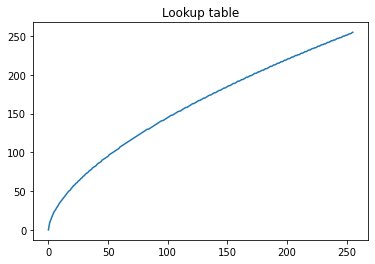

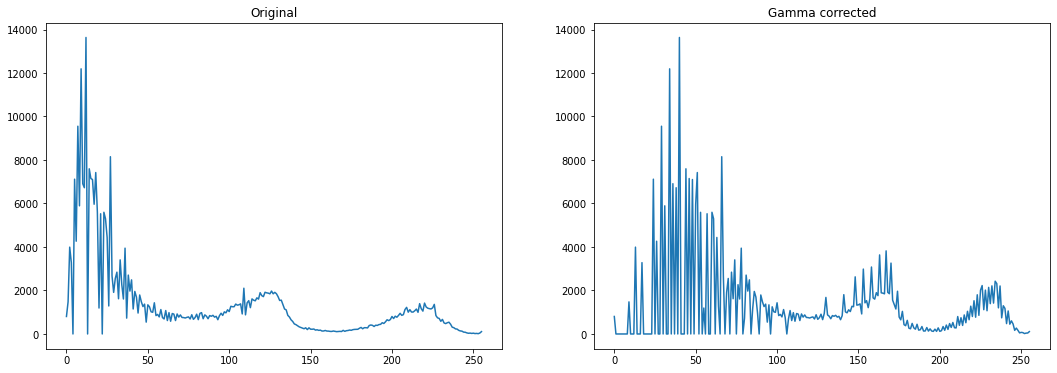

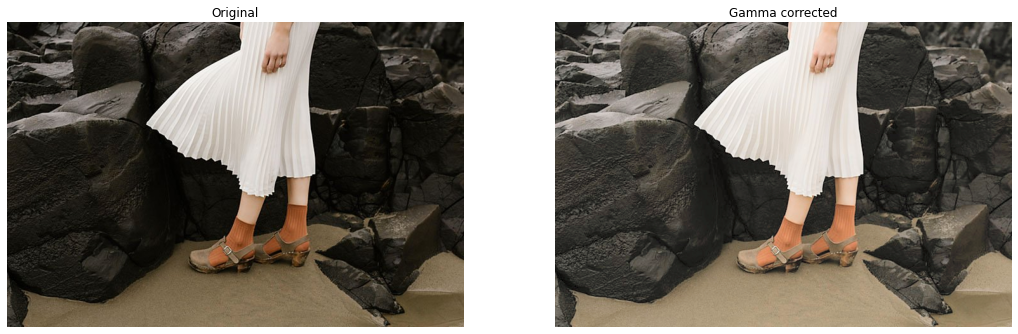

In [60]:
#for gamma = 0.6
f = cv.imread(r'highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert f is not None

orig = cv.cvtColor(f,cv.COLOR_BGR2RGB)
lab = cv.cvtColor(f,cv.COLOR_BGR2Lab)
L, a, b = cv.split(lab)
gamma = 0.6
t = np.array([(p/255.0)**(gamma)*255.0 for p in range (0,256)]).astype('uint8')

fig, ax = plt.subplots()
ax.plot(t)
ax.set_title('Lookup table')

g = cv.LUT(L, t)
lab_orig = cv.cvtColor(f,cv.COLOR_BGR2Lab)
lab[:,:,0] = g

img = cv.cvtColor(lab, cv.COLOR_Lab2RGB).astype('uint8')
hist_orig = cv.calcHist([lab_orig],[0],None,[256],[0,256])
hist_gamma = cv.calcHist([lab],[0],None,[256],[0,256])

fig, axarr = plt.subplots(1,2, figsize =(18,6))
axarr[1].plot(hist_gamma)
axarr[0].plot(hist_orig)
axarr[0].set_title('Original')
axarr[1].set_title('Gamma corrected')
    
fig, axarr2 = plt.subplots(1,2, figsize = (18,6))
axarr2[0].imshow(orig)
axarr2[0].axis('off')
axarr2[1].imshow(img)
axarr2[1].axis('off')
axarr2[0].set_title('Original')
axarr2[1].set_title('Gamma corrected')

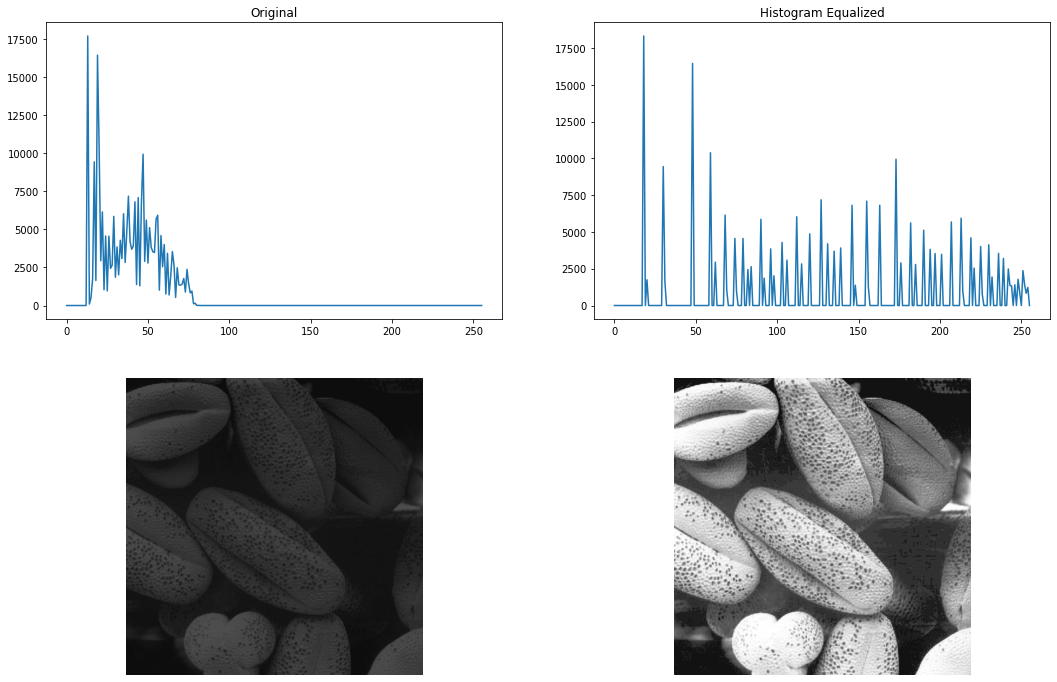

In [80]:
def Calc_hist(im):
    count = np.zeros(256)
    for i in range (im.shape[1]):
        for j in range(im.shape[0]):
            count[im[i][j]] += 1.
    return(count)

def Cumulative_sum(arr):
    cdf = arr[:]
    for i in range(len(cdf)):
        if i==0:
            continue
        else:
            cdf[i] += cdf[i-1] 
    return cdf

def equalize(f):
    height,width = f.shape
    hist = Calc_hist(f)
    fig, ax = plt.subplots(2,2, figsize=(18,12))
    ax[0,0].plot(hist)
    ax[0,0].set_title('Original')

    cdf = Cumulative_sum(hist)
    normalized = cdf*255/(height*width)

    g = cv.LUT(f,normalized).astype('uint8')
    eq_hist = Calc_hist(g)

    ax[0,1].plot(eq_hist)
    ax[0,1].set_title('Histogram Equalized')
    ax[1,0].imshow(f, cmap='gray',vmin=0,vmax=255)
    ax[1,0].axis('off')
    ax[1,1].imshow(g, cmap='gray',vmin=0,vmax=255)
    ax[1,1].axis('off')


f = cv.imread(r'shells.png',cv.IMREAD_GRAYSCALE)
assert f is not None

equalize(f)


In [38]:
def zoom(f):
    s=4
    rows, cols = f.shape[0]*s , f.shape[1]*s

    zoomed = np.zeros((rows,cols,3))
    for i in range(rows):
        for j in range(cols):
            zoomed[i][j] = f[min(269,round(i/s))][min(479,round(j/s))]

    zoomed = zoomed.astype('uint8')
    return zoomed

f = cv.imread(r'a1q5images\a1q5images\im01small.png',cv.IMREAD_COLOR)
g = cv.imread(r'a1q5images\a1q5images\im01.png',cv.IMREAD_COLOR)
assert f is not None

zoomed = zoom(f)
s = np.sum((g[:,:,0:3]-zoomed[:,:,0:3])**2)/(zoomed.shape[0]*zoomed.shape[1]*zoomed.shape[2])
print("Normalized ssd of method (a) = " + str(s))

cv.imshow('original image',f)
cv.imshow('zoomed in from function',zoomed)
cv.imshow('zoomed in given',g)
cv.waitKey(0) 
cv.destroyAllWindows() 


Normalized ssd of method (a) = 40.11174270190329


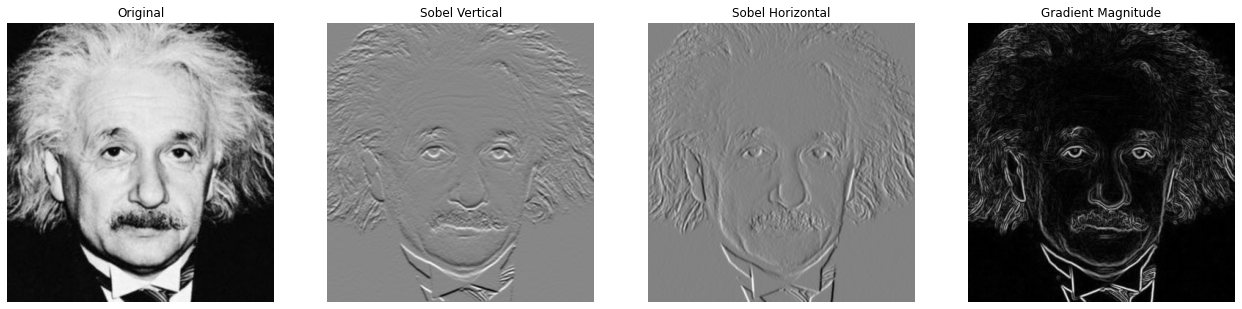

In [42]:
f = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype='float')
f_x = cv.filter2D(f, -1, sobel_v)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype='float')
f_y = cv.filter2D(f, -1, sobel_h)
grad = np.sqrt(f_x**2 + f_y**2)

fig, ax = plt.subplots(1,4, figsize=(22,10))
ax[0].imshow(f, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[1].imshow(f_x, cmap='gray')
ax[1].set_title('Sobel Vertical')
ax[2].imshow(f_y, cmap='gray')
ax[2].set_title('Sobel Horizontal')
ax[3].imshow(grad, cmap='gray')
ax[3].set_title('Gradient Magnitude')
for i in range(4):
    ax[i].axis('off')
plt.show()

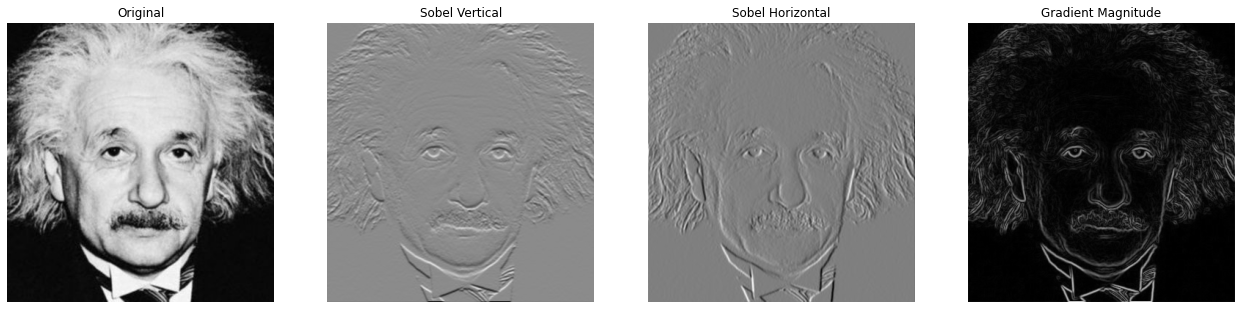

In [43]:
def convolution2d(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

f = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None
rows, cols = f.shape[0] , f.shape[1]

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype='float')
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype='float')
grad = np.sqrt(f_x**2 + f_y**2)

padded = np.zeros((rows+2,cols+2))
for i in range(rows):
    for j in range(cols):
        padded[i+1,j+1] = f[i,j]

f_x = convolution2d(padded, sobel_v)
f_y = convolution2d(padded, sobel_h)
grad = np.sqrt(f_x**2 + f_y**2)

fig, ax = plt.subplots(1,4, figsize=(22,10))
ax[0].imshow(f, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[1].imshow(f_x, cmap='gray')
ax[1].set_title('Sobel Vertical')
ax[2].imshow(f_y, cmap='gray')
ax[2].set_title('Sobel Horizontal')
ax[3].imshow(grad, cmap='gray')
ax[3].set_title('Gradient Magnitude')
for i in range(4):
    ax[i].axis('off')
plt.show()

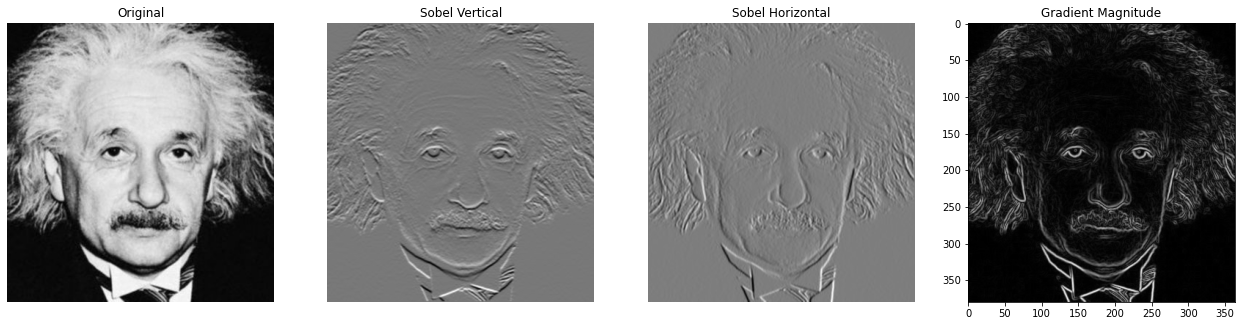

In [50]:
f = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None

sobel_h1 = np.array([[1],[2],[1]], dtype='float')
sobel_h2 = np.array([[1,0,-1]],dtype='float')
sobel_v1 = np.array([[-1],[0],[1]], dtype='float')
sobel_v2 = np.array([[-1,-2,-1]],dtype='float')
f_y1 = cv.filter2D(f, -1, sobel_h1)
f_y2 = cv.filter2D(f_y1, -1, sobel_h2)
f_x1 = cv.filter2D(f, -1, sobel_v1)
f_x2 = cv.filter2D(f_x1, -1, sobel_v2)
grad = np.sqrt(f_x2**2 + f_y2**2)

fig, ax = plt.subplots(1,4, figsize=(22,10))
ax[0].imshow(f, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[1].imshow(f_x2, cmap='gray')
ax[1].set_title('Sobel Vertical')
ax[2].imshow(f_y2, cmap='gray')
ax[2].set_title('Sobel Horizontal')
ax[3].imshow(grad, cmap='gray')
ax[3].set_title('Gradient Magnitude')
for i in range(3):
    ax[i].axis('off')
plt.show()

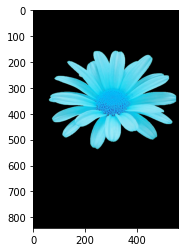

In [64]:
f = cv.imread(r'daisy.jpg')
mask = np.zeros(f.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)


rect = (50,100,500,500)
cv.grabCut(f,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
f = f*mask2[:,:,np.newaxis]
plt.imshow(f)
plt.show()